In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.__version__

'1.1.5'

# 一、文件的读取和写入
## 1.文件读取
pandas可以读取的文件格式有很多，这里主要介绍读取文件。csv, excel, txt

In [3]:
df_csv = pd.read_csv('data/my_csv.csv')
df_csv

,col1,col2,col3,col4,col5
0,2,a,1.4,apple,2020/1/1
1,3,b,3.4,banana,2020/1/2
2,6,c,2.5,orange,2020/1/5
3,5,d,3.2,lemon,2020/1/7


In [4]:
df_txt = pd.read_table('data/my_table.txt')
df_txt

,col1,col2,col3,col4
0,2,a,1.4,apple 2020/1/1
1,3,b,3.4,banana 2020/1/2
2,6,c,2.5,orange 2020/1/5
3,5,d,3.2,lemon 2020/1/7


In [5]:
df_excel = pd.read_excel('data/my_excel.xlsx')
df_excel

,col1,col2,col3,col4,col5
0,2,a,1.4,apple,2020/1/1
1,3,b,3.4,banana,2020/1/2
2,6,c,2.5,orange,2020/1/5
3,5,d,3.2,lemon,2020/1/7


这里有一些常用的公共参数，`header=None`表示第一行不作为列名，`index_col`表示把某些列或几列作为索引，索引的内容将会在第三章进行替换，`usecols`表示读取列的集合，替换为所有的列，`parse_dates`表示需要转换为时间的列，关于时间序列的有关内容将在第十章讲解，`nrows`表示读取的数据行数。上面的这些参数在上述的三个函数里都可以使用。

In [6]:
df_csv = pd.read_csv('data/my_csv.csv', header=None)
df_csv

,0,1,2,3,4
0,col1,col2,col3,col4,col5
1,2,a,1.4,apple,2020/1/1
2,3,b,3.4,banana,2020/1/2
3,6,c,2.5,orange,2020/1/5
4,5,d,3.2,lemon,2020/1/7


In [7]:
df_csv = pd.read_csv('data/my_csv.csv', index_col=['col1','col2'])
df_csv

,,col3,col4,col5
col1,col2,,,
2,a,1.4,apple,2020/1/1
3,b,3.4,banana,2020/1/2
6,c,2.5,orange,2020/1/5
5,d,3.2,lemon,2020/1/7


In [8]:
df_csv = pd.read_csv('data/my_csv.csv', usecols=['col1','col2'])
df_csv

,col1,col2
0,2,a
1,3,b
2,6,c
3,5,d


In [9]:
df_csv = pd.read_csv('data/my_csv.csv', parse_dates=['col5'])
df_csv

,col1,col2,col3,col4,col5
0,2,a,1.4,apple,2020-01-01
1,3,b,3.4,banana,2020-01-02
2,6,c,2.5,orange,2020-01-05
3,5,d,3.2,lemon,2020-01-07


In [10]:
df_csv = pd.read_csv('data/my_csv.csv', nrows=3)
df_csv

,col1,col2,col3,col4,col5
0,2,a,1.4,apple,2020/1/1
1,3,b,3.4,banana,2020/1/2
2,6,c,2.5,orange,2020/1/5


读取在txt文件时，经常遇到分隔符非空格的情况，`read_table`有一个分割参数`sep`，它使得用户可以自定义分割符号，进行txt数据的读取例如，下面的读取的表以。||||为分割：

In [11]:
pd.read_table('data/my_table_special_sep.txt')

,col1 |||| col2
0,TS |||| This is an apple.
1,GQ |||| My name is Bob.
2,WT |||| Well done!
3,PT |||| May I help you?


上面的结果可见不是理想的，这时可以使用sep，同时需要指定引擎为python：

In [12]:
pd.read_table('data/my_table_special_sep.txt',sep=' \|\|\|\| ', engine='python')

,col1,col2
0,TS,This is an apple.
1,GQ,My name is Bob.
2,WT,Well done!
3,PT,May I help you?


PS:**`sep`是正则参数**

在使用read_table的时候需要注意，参数sep中使用的是正则表达式，因此需要对|进行转义变成\|，否则无法读取到正确的结果。有关正则表达式的基本内容可以参考第八章或其他相关资料。

## 2.数据写入
一般在数据写入中，最常用的操作是把index设置为False，特别当索引没有特殊意义的时候，这样的行为能把索引在保存的时候去除。

In [13]:
df_csv.to_csv('data/my_csv_saved_T.csv', index=True)
df_csv.to_csv('data/my_csv_saved_F.csv', index=False)

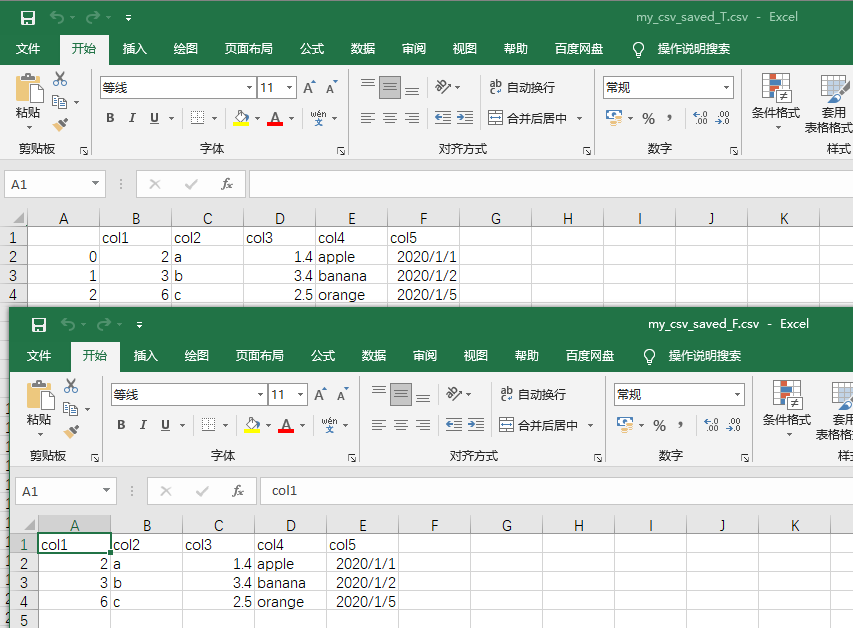

`pandas`中没有定义`to_table`函数，但是`to_csv`可以保存为txt文件，并且允许自定义分隔符，常用制表符\t分割：

In [14]:
df_txt.to_csv('data/my_txt_saved.txt', sep='\t', index=False)

如果想要把表格快速转换为markdown和latex语言，可以使用to_markdown和to_latex函数，此处需要安装tabulate包。

In [15]:
print(df_csv.to_markdown())

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

# 二、基本数据结构
pandas中具有两个基本的数据存储结构，存储一维values的Series和存储二维values的DataFrame，在这两种结构上定义了很多的属性和方法。

## 1.系列
Series一般由四个部分组成，分别是序列的值data，索引index，存储类型dtype，序列的名字name。其中，索引也可以指定它的名字，替换为空。

In [18]:
s = pd.Series(data = [100, 'a', {'dic1':5}],
               index = pd.Index(['id1', 20, 'third'], name='my_idx'),
               dtype = 'object',
               name = 'my_name')
s

my_idx
id1              100
20                 a
third    {'dic1': 5}
Name: my_name, dtype: object

>object类型<br/>object代表，一种混合类型，先前的示例中存储的整体，串行以及Python的字典数据结构。而，目前pandas把纯串行序列也视为是一种object类型的序列，但它也可以用string类型存储，文本序列的内容会在第八章中讨论。

对于这些属性，可以通过.的方式来获取：

In [19]:
print(s.values)
print(s.index)
print(s.dtype)
print(s.name)

[100 'a' {'dic1': 5}]
Index(['id1', 20, 'third'], dtype='object', name='my_idx')
object
my_name


In [20]:
print(s.shape)
print(s['third'])
print(s[20])

(3,)
{'dic1': 5}
a


## 2.数据帧
DataFrame在Series的基础上增加了列索引，一个数据框可以由二维的data与行列索引来构造：

In [21]:
data = [[1, 'a', 1.2], [2, 'b', 2.2], [3, 'c', 3.2]]
df = pd.DataFrame(data = data,
                   index = ['row_%d'%i for i in range(3)],
                   columns=['col_0', 'col_1', 'col_2'])
df

,col_0,col_1,col_2
row_0,1,a,1.2
row_1,2,b,2.2
row_2,3,c,3.2


但一般而言，更多的时候会采用从列索引名到数据的映射来构造数据框，同时再加上行索引：

In [22]:
df = pd.DataFrame(data = {'col_0': [1,2,3], 'col_1':list('abc'),
                          'col_2': [1.2, 2.2, 3.2]},
                   index = ['row_%d'%i for i in range(3)])
df

,col_0,col_1,col_2
row_0,1,a,1.2
row_1,2,b,2.2
row_2,3,c,3.2


由于这种映射关系，在DataFrame中可以用`[col_name]`与`[col_list]`来收回相应的列与由多个列组成的表，结果分别为Series和和DataFrame：

In [23]:
df['col_0']

row_0    1
row_1    2
row_2    3
Name: col_0, dtype: int64

In [24]:
df[['col_0','col_1']]

,col_0,col_1
row_0,1,a
row_1,2,b
row_2,3,c


与Series类似，在数据之上同样可以收回相应的属性：

In [25]:
print(df.values)
print('-'*30)
print(df.index)
print('-'*30)
print(df.columns)
print('-'*30)
print(df.dtypes)
print('-'*30)
print(df.shape)
print('-'*30)

[[1 'a' 1.2]
 [2 'b' 2.2]
 [3 'c' 3.2]]
------------------------------
Index(['row_0', 'row_1', 'row_2'], dtype='object')
------------------------------
Index(['col_0', 'col_1', 'col_2'], dtype='object')
------------------------------
col_0      int64
col_1     object
col_2    float64
dtype: object
------------------------------
(3, 3)
------------------------------


通过.T可以把DataFrame进行转置：

In [26]:
df.T

,row_0,row_1,row_2
col_0,1,2,3
col_1,a,b,c
col_2,1.2,2.2,3.2


# 三、常用基本函数
为了进行说明，在随后的部分和其余章节都将使用复制learn_pandas.csv的虚拟数据集，它记录了四所学校学生的体测个人信息。

In [27]:
df = pd.read_csv('data/learn_pandas.csv')
df.columns

Index(['School', 'Grade', 'Name', 'Gender', 'Height', 'Weight', 'Transfer',
       'Test_Number', 'Test_Date', 'Time_Record'],
      dtype='object')

上述列名依次代表学校，年级，姓名，性别，身高，体重，是否为转系生，体测场次，测试时间，1000米成绩，本章轻松使用其中的前七列。

In [28]:
df = df[df.columns[:7]]

## 1.汇总函数
head, tail分别函数表示报道查看表或者序列的前n行后状语从句：n行，其中n默认为5：

In [29]:
df.head(5)

,School,Grade,Name,Gender,Height,Weight,Transfer
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,174.0,74.0,N


`info, describe`分别返回表的信息概况和表中数值列对应的主要统计量：

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   School    200 non-null    object 
 1   Grade     200 non-null    object 
 2   Name      200 non-null    object 
 3   Gender    200 non-null    object 
 4   Height    183 non-null    float64
 5   Weight    189 non-null    float64
 6   Transfer  188 non-null    object 
dtypes: float64(2), object(5)
memory usage: 11.1+ KB


In [31]:
df.describe()

,Height,Weight
count,183.000000,189.000000
mean,163.218033,55.015873
std,8.608879,12.824294
min,145.400000,34.000000
25%,157.150000,46.000000
50%,161.900000,51.000000
75%,167.500000,65.000000
max,193.900000,89.000000


>`info, describe`只能实现最佳信息的展示，如果想要对一份数据集进行全面且有效的观察，特别是在列对准的情况下，推荐使用`pandas-profiling`包，使其在第十一章被再次提到。



## 2.特征统计函数
在Series和DataFrame上定义了许多统计函数，最常见的是。例如，选出身高和体重列进行演示：`sum, mean, median, var, std, max, min`

In [32]:
df_demo = df[['Height','Weight']]
df_demo

,Height,Weight
0,158.9,46.0
1,166.5,70.0
2,188.9,89.0
3,NaN,41.0
4,174.0,74.0
...,...,...
195,153.9,46.0
196,160.9,50.0
197,153.9,45.0
198,175.3,71.0


In [33]:
print(df_demo.mean())
print('-'*30)
print(df_demo.max())
print('-'*30)
print(df_demo.quantile(0.75))
print('-'*30)
print(df_demo.count())
print('-'*30)
print(df_demo.idxmax())
print('-'*30)

Height    163.218033
Weight     55.015873
dtype: float64
------------------------------
Height    193.9
Weight     89.0
dtype: float64
------------------------------
Height    167.5
Weight     65.0
Name: 0.75, dtype: float64
------------------------------
Height    183
Weight    189
dtype: int64
------------------------------
Height    193
Weight      2
dtype: int64
------------------------------


上面这些所有的函数，由于操作后返回的是标量，所以又称为聚合函数，它们有一个公共参数`axis`，而是为0代表逐列聚合，如果设置为1则表示逐行聚合：

In [34]:
df_demo.mean(axis=1)

0      102.45
1      118.25
2      138.95
3       41.00
4      124.00
        ...  
195     99.95
196    105.45
197     99.45
198    123.15
199    103.35
Length: 200, dtype: float64

## 3.唯一值函数
对序列使用`unique`和`nunique`可以分别得到其唯一值组成的列表和唯一值的个数：

In [35]:
df['School'].unique()

array(['Shanghai Jiao Tong University', 'Peking University',
       'Fudan University', 'Tsinghua University'], dtype=object)

In [36]:
df['School'].nunique()

4

`value_counts `可以得到唯一值和其对应出现的频数：

In [37]:
df['School'].value_counts()

Tsinghua University              69
Shanghai Jiao Tong University    57
Fudan University                 40
Peking University                34
Name: School, dtype: int64

如果想要观察多个列组合的唯一值，可以使用`drop_duplicates`。其中的关键参数是keep，替换值first表示每个组合保留第一次出现的所在行，last表示保留最后一次出现的所在行，False表示把所有重复组合所在的行剔除。

In [39]:
df_demo = df[['Gender','Transfer','Name']]
df_demo

,Gender,Transfer,Name
0,Female,N,Gaopeng Yang
1,Male,N,Changqiang You
2,Male,N,Mei Sun
3,Female,N,Xiaojuan Sun
4,Male,N,Gaojuan You
...,...,...,...
195,Female,N,Xiaojuan Sun
196,Female,N,Li Zhao
197,Female,N,Chengqiang Chu
198,Male,N,Chengmei Shen


In [40]:
df_demo.drop_duplicates(['Gender', 'Transfer'])

,Gender,Transfer,Name
0,Female,N,Gaopeng Yang
1,Male,N,Changqiang You
12,Female,NaN,Peng You
21,Male,NaN,Xiaopeng Shen
36,Male,Y,Xiaojuan Qin
43,Female,Y,Gaoli Feng


In [41]:
df_demo.drop_duplicates(['Gender', 'Transfer'], keep='last')

,Gender,Transfer,Name
147,Male,NaN,Juan You
150,Male,Y,Chengpeng You
169,Female,Y,Chengquan Qin
194,Female,NaN,Yanmei Qian
197,Female,N,Chengqiang Chu
199,Male,N,Chunpeng Lv


In [42]:
df_demo.drop_duplicates(['Name', 'Gender'],keep=False).head()
# 保留只出现过一次的性别和姓名组合

,Gender,Transfer,Name
0,Female,N,Gaopeng Yang
1,Male,N,Changqiang You
2,Male,N,Mei Sun
4,Male,N,Gaojuan You
5,Female,N,Xiaoli Qian


In [43]:
df['School'].drop_duplicates() # 在Series上也可以使用

0    Shanghai Jiao Tong University
1                Peking University
3                 Fudan University
5              Tsinghua University
Name: School, dtype: object

此外，`duplicated`和`drop_duplicates`的功能类似，但前者返回了是否为唯一值的布尔列表，其keep参数与相同一致。其返回的序列，把重复元素设置True，否则为False。`drop_duplicates`等价于把`duplicated`为True的对应行剔除。

In [44]:
df_demo.duplicated(['Gender', 'Transfer']).head()

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [45]:
df['School'].duplicated().head() # 在Series上也可以使用

0    False
1    False
2     True
3    False
4     True
Name: School, dtype: bool

## 4.替换函数
一般而言，替换操作是针对某一个列进行的，因此下面的示例都以替换Series。pandas中的替换函数可以归纳为三类：映射替换，逻辑替换，数值替换。其中映射替换`replace`方法，第八章中的`str.replace`方法以及第九章中的`cat.codes`方法，此处介绍`replace`的用法。

在`replace`中，可以通过字典构造，或者加入两个列表来进行替换：

In [46]:
df['Gender'].replace({'Female':0, 'Male':1}).head()

0    0
1    1
2    1
3    0
4    1
Name: Gender, dtype: int64

In [47]:
df['Gender'].replace(['Female', 'Male'], [0, 1]).head()

0    0
1    1
2    1
3    0
4    1
Name: Gender, dtype: int64

另外，replace还有一种特殊的方向替换，指定`method`参数为`ffill`则为用一个最近的值进行`bfill`替换，则使用后面最近的值进行替换。从下面的例子可以看到，它们的结果是不同的：

In [50]:
s = pd.Series(['a', 1, 'b', 2, 1, 1, 'a'])
s.replace([1, 2], method='ffill')

0    a
1    a
2    b
3    b
4    b
5    b
6    a
dtype: object

In [51]:
s.replace([1, 2], method='bfill')

0    a
1    b
2    b
3    a
4    a
5    a
6    a
dtype: object

>正则替换请使用 str.replace<br/>
虽然对于replace而言可以使用正则替换，但是当前版本下对于string类型的正则替换仍存在bug，因此如有此需求，请选择str.replace进行替换操作，具体的方式将在第八章中讲解。

逻辑替换包括了`where`和`mask`，这两个函数是完全对称的：`where`函数在替换条件为False的对应行进行mask替换，而在替换条件为True的对应行进行替换，当不指定替换值时，替换为缺失值。

In [53]:
s = pd.Series([-1, 1.2345, 100, -50])
s.where(s<0)

0    -1.0
1     NaN
2     NaN
3   -50.0
dtype: float64

In [54]:
s.where(s<0, 100)

0     -1.0
1    100.0
2    100.0
3    -50.0
dtype: float64

In [55]:
s.mask(s<0)

0         NaN
1      1.2345
2    100.0000
3         NaN
dtype: float64

In [56]:
s.mask(s<0, -50)

0    -50.0000
1      1.2345
2    100.0000
3    -50.0000
dtype: float64

需要注意的是，预期的条件只需是与被调用的Series索引一致的布尔序列即可：

In [57]:
s_condition= pd.Series([True,False,False,True],index=s.index)
s.mask(s_condition, -50)

0    -50.0000
1      1.2345
2    100.0000
3    -50.0000
dtype: float64

数值替换包含了方法，它们分别表示按照给定精度四舍五入，取绝对值和截断：`round, abs, clip`

In [91]:
s = pd.Series([-1, 1.2345, 100, -50])
s.round(3)

0     -1.000
1      1.234
2    100.000
3    -50.000
dtype: float64

In [60]:
s.abs()

0      1.0000
1      1.2345
2    100.0000
3     50.0000
dtype: float64

In [62]:
s.clip(0, 2) # 前两个数分别表示上下截断边界

0    0.0000
1    1.2345
2    2.0000
3    0.0000
dtype: float64

In [80]:
s.clip(0, 2)

0    0.0000
1    1.2345
2    2.0000
3    0.0000
dtype: float64

>练一练<br/>
在clip中，超过边界的只能截断为边界值，如果要把超出边界的替换为自定义的值，正确如何做？



In [90]:
s_condition = ((s<0).values) | ((s>2).values)
s_condition

array([ True, False,  True,  True])

In [92]:
s.mask(s_condition, -50)

0   -50.0000
1     1.2345
2   -50.0000
3   -50.0000
dtype: float64

## 5.排序函数
排序共有两种方式，其一为值排序，其二为索引排序，对应的函数是`sort_values`和`sort_index`。

为了演示排序函数，下面先利用`set_index`方法把年级和名字两列作为索引，多级索引的内容和索引设置的方法将在第三章进行详细讲解。

In [93]:
df_demo = df[['Grade', 'Name', 'Height',
               'Weight']].set_index(['Grade','Name'])

对身高进行排序，默认参数ascending=True为升序：

In [94]:
df_demo.sort_values('Height').head()

,,Height,Weight
Grade,Name,,
Junior,Xiaoli Chu,145.4,34.0
Senior,Gaomei Lv,147.3,34.0
Sophomore,Peng Han,147.8,34.0
Senior,Changli Lv,148.7,41.0
Sophomore,Changjuan You,150.5,40.0


In [95]:
df_demo.sort_values('Height', ascending=False).head()

Height  Weight
Grade    Name                         
Senior   Xiaoqiang Qin   193.9    79.0
         Mei Sun         188.9    89.0
         Gaoli Zhao      186.5    83.0
Freshman Qiang Han       185.3    87.0
Senior   Qiang Zheng     183.9    87.0

在排序中，经常遇到多列排序的问题，某些在体重相同的情况下，对身高进行排序，并保持身高降序排列，体重升序排列：

In [96]:
df_demo.sort_values(['Weight','Height'],ascending=[True,False]).head()

,,Height,Weight
Grade,Name,,
Sophomore,Peng Han,147.8,34.0
Senior,Gaomei Lv,147.3,34.0
Junior,Xiaoli Chu,145.4,34.0
Sophomore,Qiang Zhou,150.5,36.0
Freshman,Yanqiang Xu,152.4,38.0


索引排序的用法和值排序完全一致，只不过元素的值在索引中，此时需要指定索引层的名字或者层号，用参数level表示。另外，需要注意的是的的排列顺序由字母顺序决定。

In [98]:
df_demo.sort_index(level=['Grade','Name'],ascending=[True,False])

Height  Weight
Grade     Name                           
Freshman  Yanquan Wang      163.5    55.0
          Yanqiang Xu       152.4    38.0
          Yanqiang Feng     162.3    51.0
          Yanpeng Lv          NaN    65.0
          Yanli Zhang       165.1    52.0
...                           ...     ...
Sophomore Chengqiang Lv     166.8    53.0
          Chengli You       164.1    57.0
          Changqiang Qian   167.6    64.0
          Changmei Xu       151.6    43.0
          Changjuan You     150.5    40.0

[200 rows x 2 columns]

## 6.apply方法
`apply`方法常用于DataFrame的行迭代或列迭代，它的`axis`含义与第2小节中的统计聚合函数一致，`apply`的参数往往是一个以序列为输入的函数。例如对于`.mean()`，使用apply可以如下地写出：

In [99]:
df_demo = df[['Height', 'Weight']]
def my_mean(x):
    res = x.mean()
    return res
df_demo.apply(my_mean)

Height    163.218033
Weight     55.015873
dtype: float64

同样的，可以利用`lambda`表达式合理书写简洁，这里的x就指代被调用的`df_demo`表中逐个输入的序列：

In [100]:
df_demo.apply(lambda x:x.mean())

Height    163.218033
Weight     55.015873
dtype: float64

若指定axis=1，那么每次预期函数的就是行元素组成的Series，其结果与之前的逐行均值结果一致。

In [101]:
df_demo.apply(lambda x:x.mean(), axis=1).head()

0    102.45
1    118.25
2    138.95
3     41.00
4    124.00
dtype: float64

这里再举一个例子：`mad`函数返回的是是一个序列中替换该序列均值的绝对值大小的均值，例如序列1,3,7,10中，均值5.25，每一个元素替换的绝对值4.25,2.25 ，1.75,4.75，这个替代序列的均值3.25。现在利用`apply`计算身高和体重的`mad`指标：

In [102]:
df_demo.apply(lambda x:(x-x.mean()).abs().mean())

Height     6.707229
Weight    10.391870
dtype: float64

这与使用内置的mad函数计算结果一致：



In [103]:
df_demo.mad()

Height     6.707229
Weight    10.391870
dtype: float64

>谨慎使用 apply<br/>
一般而言apply，使用pandas的内置函数处理和apply来处理同一个任务，其速度会相差较小，因此只有在确实存在自定义需求的情境下才考虑使用apply。

# 四、窗口对象
pandas中有3类窗口，分别是滑动窗口`rolling`，窗口显示扩张`expanding`以及指数加权窗口显示`ewm`。需要说明的是，以日期偏置为窗口大小的滑动窗口将在第十章讨论，指数加权窗口见本章练习。

## 1.滑窗对象
要使用滑窗函数，就必须先要对一个序列使用得到`.rolling`滑窗对象，其最重要的参数为窗口大小`window`。

In [104]:
s = pd.Series([1,2,3,4,5])
roller = s.rolling(window = 3)
roller

Rolling [window=3,center=False,axis=0]

在得到了滑窗对象后，能够使用相应的聚合函数进行计算，需要注意的窗口包含当前行所在的元素，例如在第四个位置进行均值运算时，是计算（2 + 3 + 4）/ 3，而不是（1 + 2 + 3）/ 3：

In [105]:
roller.mean()

0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
dtype: float64

In [106]:
roller.sum()

0     NaN
1     NaN
2     6.0
3     9.0
4    12.0
dtype: float64

对于滑动相关系数或滑动协方差的计算，可以如下写出：

In [108]:
s2 = pd.Series([1,2,6,16,30])
roller.cov(s2)

0     NaN
1     NaN
2     2.5
3     7.0
4    12.0
dtype: float64

In [109]:
roller.corr(s2)

0         NaN
1         NaN
2    0.944911
3    0.970725
4    0.995402
dtype: float64

此外，还支持使用apply预设的自定义函数，其初始值是对应窗口的Series，例如上述的均值函数可以等效表示：

In [110]:
roller.apply(lambda x:x.mean())

0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
dtype: float64

`shift, diff, pct_change`是一组类滑窗函数，它们的公共参数为`periods=n`，默认为1，分别表示朝向前第一个n元素的值，与向前第一个n元素做差（与Numpy中不同，表示n分层差分），与向向前第n个元素相比计算增长率。这里n可以为负，表示反方向的类似操作。

In [111]:
s = pd.Series([1,3,6,10,15])
s.shift(2)

0    NaN
1    NaN
2    1.0
3    3.0
4    6.0
dtype: float64

In [112]:
s.diff(3)

0     NaN
1     NaN
2     NaN
3     9.0
4    12.0
dtype: float64

In [113]:
s.pct_change()

0         NaN
1    2.000000
2    1.000000
3    0.666667
4    0.500000
dtype: float64

In [114]:
s.shift(-1)

0     3.0
1     6.0
2    10.0
3    15.0
4     NaN
dtype: float64

In [115]:
s.diff(-2)

0   -5.0
1   -7.0
2   -9.0
3    NaN
4    NaN
dtype: float64

其视作类滑窗函数的原因是，它们的功能可以用窗口大小为n+1的`rolling`方法等价代替：

In [122]:
s.rolling(3).apply(lambda x:list(x)[0]) # s.shift(2)

0    NaN
1    NaN
2    1.0
3    3.0
4    6.0
dtype: float64

In [117]:
s.rolling(4).apply(lambda x:list(x)[-1]-list(x)[0]) # s.diff(3)

0     NaN
1     NaN
2     NaN
3     9.0
4    12.0
dtype: float64

In [120]:
def my_pct(x):
    L = list(x)
    return L[-1]/L[0]-1
s.rolling(2).apply(my_pct) # s.pct_change()

0         NaN
1    2.000000
2    1.000000
3    0.666667
4    0.500000
dtype: float64

>练一练<br/>
rolling对象的某些窗口方向都是向前的，某些情况下用户需要向后的窗口，例如对1,2,3设置向后窗口为2的sum操作，结果为3,5，NaN，此时应该如何实现向后的滑窗操作？



In [143]:
s=pd.Series([1,2,3])
s.rolling(2).sum()

0    NaN
1    3.0
2    5.0
dtype: float64

In [156]:
s = s.sort_values(ascending = False)
s

2    3
1    2
0    1
dtype: int64

In [158]:
s.rolling(2).sum().sort_values()

0    3.0
1    5.0
2    NaN
dtype: float64

## 2.扩展窗口
扩展窗口又称递增窗口，可以理解为一个动态长度的窗口，其窗口的大小就是从序列开始处到特定操作的对应位置，其使用的聚合函数会作用于这些逐步扩展的窗口上。 ，设置序列为a1，a2，a3，a4，则其每个位置对应的窗口即[a1]，[a1，a2]，[a1，a2，a3]，[a1，a2，a3，a4]。

In [163]:
s = pd.Series([1, 3, 6, 10])
s.expanding().mean()

0    1.000000
1    2.000000
2    3.333333
3    5.000000
dtype: float64

>练一练<br/>
cummax, cumsum, cumprod函数是典型的类expanding扩展窗口函数，请使用对象依次实现它们。



In [164]:
s.expanding().sum()

0     1.0
1     4.0
2    10.0
3    20.0
dtype: float64

In [165]:
s.expanding().max()

0     1.0
1     3.0
2     6.0
3    10.0
dtype: float64

In [170]:
def prod(x):
    k=1
    for i in x.values:
        k=k*i
    return k
s.expanding().apply(prod)

0      1.0
1      3.0
2     18.0
3    180.0
dtype: float64